In [30]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI
from dotenv import load_dotenv
import os

In [ ]:
# load_dotenv()
# api_key = os.getenv("OPENAI_API_KEY")

# llm = OpenAI(
#     model="gpt-3.5-turbo",
#     temperature=0.7,
#     max_tokens=1000,
#     api_key=api_key
# )

In [27]:
load_dotenv()

llm = ChatOpenAI(
    model="llama3-70b-8192",  # or "llama3-70b-8192", "mixtral-8x7b-32768", "llama3-8b-8192"
    openai_api_key=os.getenv("GROQ_API_KEY"),
    openai_api_base="https://api.groq.com/openai/v1"
)

response = llm.invoke("Explain the difference between supervised and unsupervised learning in 2 lines.")
print(response.content)

Here is a 2-line explanation:

In supervised learning, the algorithm is trained on labeled data where the correct output is already known, and the goal is to learn a mapping between input and output. In unsupervised learning, the algorithm is trained on unlabeled data, and the goal is to discover patterns, relationships, or structure in the data without a specific output in mind.


In [36]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

class MyState(TypedDict):
    question: str
    answer: str

def chat(state: MyState) -> MyState:
    response = llm.invoke(state["question"])
    state["answer"] = response.content
    return state

graph = StateGraph(MyState)

graph.add_node("conversation", chat)

graph.add_edge(START, "conversation")
graph.add_edge("conversation", END)

workflow = graph.compile()

initial_state = MyState(question="What is the capital of India?")
final_state = workflow.invoke(initial_state)

print(final_state)  # Should print the state with the answer
print(final_state["answer"])  # Should print "New Delhi"


{'question': 'What is the capital of India?', 'answer': 'The capital of India is New Delhi.'}
The capital of India is New Delhi.


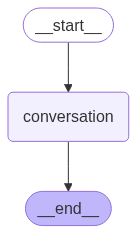

In [37]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())
